In [21]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import layers
from keras.layers import Embedding, Flatten
import numpy as np
import matplotlib.pyplot as plt
#from tf.keras import regularizers

In [22]:
#data upload
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [23]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [24]:
id_list = train_data['id']
text_list = train_data['text']
target_list = train_data['target']


In [25]:
train_tweets = [i for i in text_list]
ids = [i for i in id_list]
targets = [i for i in target_list]

In [26]:
# traininig data preparation
tokenizer = Tokenizer(num_words= 10000)
tokenizer.fit_on_texts(train_tweets)
word_index = tokenizer.word_index
train_tweets = tokenizer.texts_to_sequences(train_tweets)
pads = pad_sequences(train_tweets, maxlen = 40)
np.random.shuffle(pads)

In [27]:
#test data preparation
test_tw = test_data['text']
test_tweets = [i for i in test_tw]
tokenizer.fit_on_texts(test_tweets)
test_tweets = tokenizer.texts_to_sequences(test_tweets)
test_pads = pad_sequences(test_tweets, maxlen = 40)


In [28]:
#validation training set
par_train = pads[:7000]
val_train = pads[7000:]



In [29]:
#validation targets
train_targets = np.asarray(targets).astype('int32')
partial_train_targets = train_targets[:7000]
val_targ = train_targets[7000:]


In [30]:
#network configuration
network = keras.Sequential()
network.add(layers.Embedding(10000, 16, input_length = 40 ))
#network.add(layers.Flatten())
network.add(layers.GlobalAveragePooling1D())
network.add(layers.Dense(16, activation = 'relu')) #,kernel_regularizers = regularizers.l2(0.001))
network.add(layers.Dense(1, activation = 'sigmoid'))


In [31]:
#network compilation
network.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

In [32]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 16)            160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = network.fit(par_train, partial_train_targets,
                    epochs = 10,
                    batch_size = 512,
                    validation_data = (val_train, val_targ))

Epoch 1/20
14/14 [==============================] - 1s 26ms/step - loss: 0.6916 - accuracy: 0.5540 - val_loss: 0.6953 - val_accuracy: 0.4715
Epoch 2/20
14/14 [==============================] - 0s 13ms/step - loss: 0.6867 - accuracy: 0.5790 - val_loss: 0.6994 - val_accuracy: 0.4715
Epoch 3/20
14/14 [==============================] - 0s 14ms/step - loss: 0.6822 - accuracy: 0.5790 - val_loss: 0.7073 - val_accuracy: 0.4715
Epoch 4/20
14/14 [==============================] - 0s 13ms/step - loss: 0.6792 - accuracy: 0.5790 - val_loss: 0.7148 - val_accuracy: 0.4715
Epoch 5/20
14/14 [==============================] - 0s 10ms/step - loss: 0.6780 - accuracy: 0.5790 - val_loss: 0.7183 - val_accuracy: 0.4715
Epoch 6/20
14/14 [==============================] - 0s 12ms/step - loss: 0.6770 - accuracy: 0.5790 - val_loss: 0.7170 - val_accuracy: 0.4715
Epoch 7/20
14/14 [==============================] - 0s 14ms/step - loss: 0.6758 - accuracy: 0.5790 - val_loss: 0.7160 - val_accuracy: 0.4715
Epoch 8/20
14

In [34]:
history_dict = history.history

In [35]:
#define a train/val loss plot
def plot_test_val_loss(history_dict):
    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    acc = history_dict['accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, train_loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

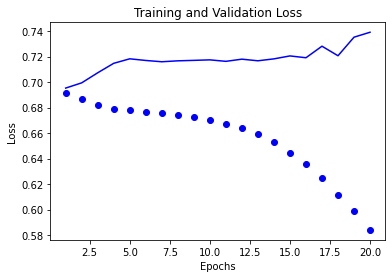

In [36]:
plot_test_val_loss(history_dict)

In [37]:
#define a train/val accuracy plot
def plot_test_val_acc(history_dict):
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

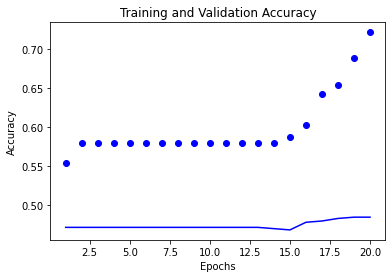

In [38]:
plot_test_val_acc(history_dict)


In [39]:
#network.evaluate(val_train, val_targ)